# Análisis Exploratorio de Datos

In [1]:
# Agregamos la raíz del proyecto al path y para importar los paquetes de src 
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Importamos librerías necesarias
import src.data.preprocess as pp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Carga de Datos 

In [2]:
# Cargamos el dataset limpio
df = pp.preprocesar_datos()

Iniciando preprocesamiento...
Registros iniciales: 30000
Registros eliminados por inconsistencias de deuda: 1739
Registros eliminados por inconsistencias factura-pago: 2769
Registros finales: 25492
Preprocesamiento completado.


In [19]:
# Vista general del dataset
print(f'(filas, columnas) = {df.shape}')
df.head()

(filas, columnas) = (25492, 9)


,limite_credito,genero,educacion,estado_civil,edad,meses_deuda_sep,pago_sep,factura_sep,default_oct
0,20000,2,2,1,24,-2,0,0,1
2,90000,2,2,2,34,0,15549,5000,0
3,50000,2,2,1,37,0,29547,1000,0
4,50000,1,2,1,57,0,19131,679,0
5,50000,1,1,2,37,0,20024,800,0


### 2.1 Análisis de cada variable

C:\Users\matia\AppData\Local\Temp\ipykernel_18100\3092867855.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\matia\AppData\Local\Temp\ipykernel_18100\3092867855.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\matia\AppData\Local\Temp\ipykernel_18100\3092867855.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\matia\AppData\Local\Temp\ipykernel_18100\3092867855.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].

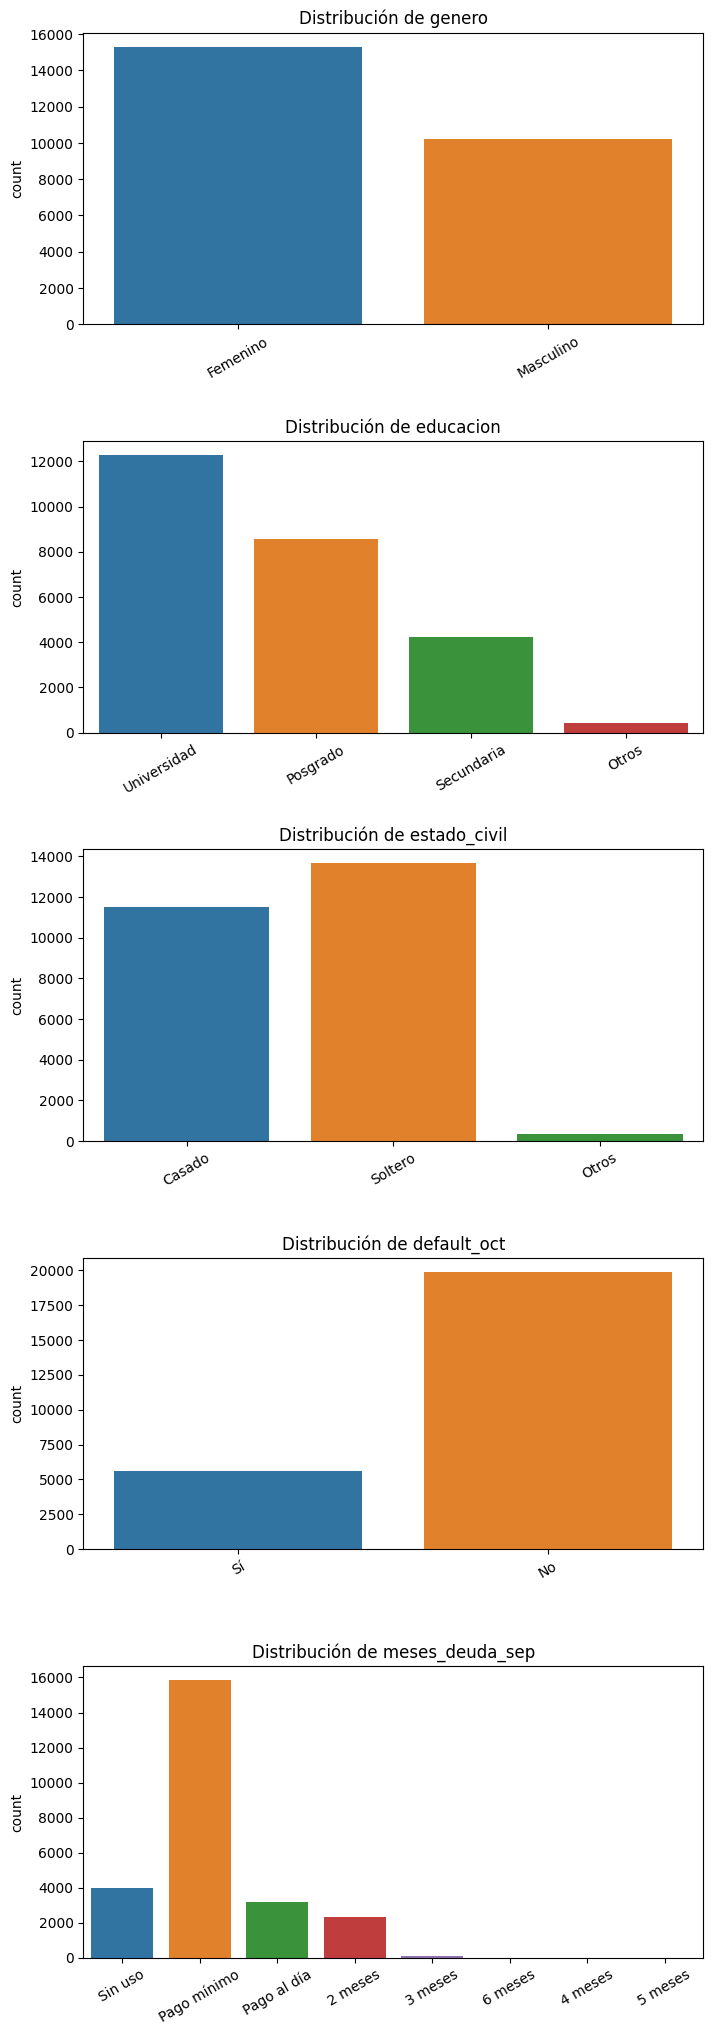

In [15]:
# Guardamos las variables categóricas para generar gráficos de barras y observar la distribución
col_cat = ['genero', 'educacion', 'estado_civil', 'default_oct', 'meses_deuda_sep']

# Creamos una copia del dataframe para mapear las categorías con los numeros
df_vis = df.copy()

# Definimos los mapeos
diccionarios_mapeo = {
    'genero': {1: 'Masculino', 2: 'Femenino'},
    'educacion': {1: 'Posgrado', 2: 'Universidad', 3: 'Secundaria', 4: 'Otros'},
    'estado_civil': {1: 'Casado', 2: 'Soltero', 3: 'Otros'},
    'default_oct': {0: 'No', 1: 'Sí'},
    'meses_deuda_sep': {-2: 'Sin uso', -1: 'Pago al día', 0: 'Pago mínimo',
         2: '2 meses', 3: '3 meses', 4: '4 meses', 5: '5 meses', 6: '6 meses'}
}

# Aplicamos el mapeo al dataset auxiliar
for col in col_cat:
    if col in diccionarios_mapeo:
        df_vis[col] = df_vis[col].map(diccionarios_mapeo[col])

# Gráficos de barras
fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(8, 25))
fig.subplots_adjust(hspace=0.40)

for i, col in enumerate(col_cat):
    sns.countplot(x=col, data=df_vis, ax=ax[i], hue=col)
    ax[i].set_title(f'Distribución de {col}')
    ax[i].set_xlabel('')
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)

plt.show()

**Observaciones:**

Niveles de las variables de interés:
- 'genero': 2 (Femenino, Masculino)
- 'educacion': 4 (Posgrado, Universidad, Secundaria, Otros). En este caso la gran mayoría de clientes alcanzaron un nivel universitario o superior
- 'estado_civil': 3 (Casado, Soltero, Otros). La mayor parte de los clientes son solteros
- 'default_oct': 2 (Sí, No). La gran mayoría de los clientes no caen en default en octubre. Aca se evidencia un desbalance entre las clases de la variable a predecir que deberá ser tenido en cuenta a la hora de desarrollar un modelo de ML
- 'meses_deuda_sep': (Sin Uso, Pago Mínimo, Pago al día, X meses). La gran mayoría de los clientes presenta el pago mínimo de su tarjeta en el mes de septiembre.

In [5]:
# Estadísticas de las variables numéricas
df.drop(columns=col_cat).describe()

,limite_credito,edad,pago_sep,factura_sep
count,25492.000000,25492.000000,25492.000000,25492.000000
mean,163228.843559,35.357092,43298.034874,5626.481916
std,128605.000470,9.226306,62188.594355,18902.855357
min,10000.000000,21.000000,-339603.000000,0.000000
25%,50000.000000,28.000000,1476.750000,326.000000
50%,130000.000000,34.000000,19800.000000,1701.000000
75%,230000.000000,41.000000,56149.500000,4328.750000
max,1000000.000000,79.000000,961664.000000,528666.000000


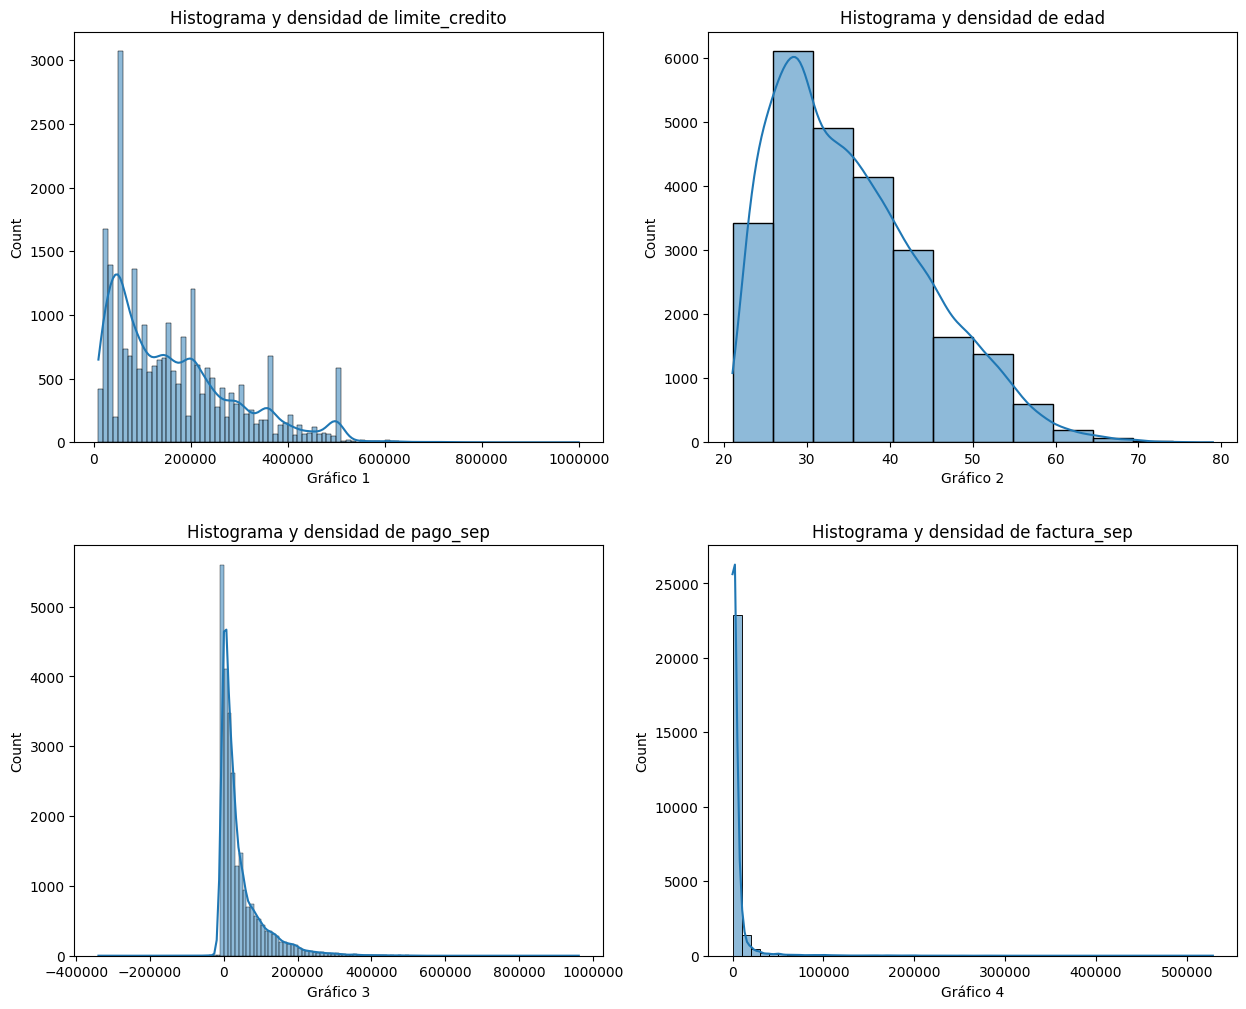

In [18]:
# Guardamos las variables numéricas
col_num = ['limite_credito', 'edad', 'pago_sep', 'factura_sep']


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,12))
fig.subplots_adjust(hspace=0.25)
ax = ax.flatten() # flatten() aplana la matriz de 2x2 en un vector iterable para las gráficas

for i, col in enumerate(col_num):
    if col == 'edad':
        wbin = 5
    else:
        wbin = 10000
    sns.histplot(x=col, data=df_vis, ax=ax[i], binwidth = wbin, kde=True)
    ax[i].set_title(f'Histograma y densidad de {col}')
    ax[i].set_xlabel(f'Gráfico {i+1}')
    ax[i].ticklabel_format(style='plain', axis='x')



**Observaciones:**
1. Aunque la media de edad es 35 años, la curva de densidad muestra que la base de clientes es predominantemente joven, con un leve sesgo a la derecha. (Gráfico 2)
2. El histograma de limite_credito presenta picos marcados en valores especificos. Esto sugiere que la asignación de crédito sigue reglas de negocio estandarizadas en lugar de un calculo con una formula continua exacta. Podemos ver un sesgo a la derecha con clientes con un limite de crédito muy alto que supera el tercer cuartil (+230.000 NT$). (Gráfico 1)
3. Tanto pago_sep como factura_sep presentan distribuciones extremadamente sesgadas a la derecha. Los gráficos confirman que los valores atípicos son casos excepcionales, mientras que el grueso de los clientes se concentra en montos bajos de pago y facturación. (Gráficos 3 y 4)